### #상장기업의 시가총액 데이터 분석 Workshop



### 시가총액

상장기업의 시가총액 데이터를 분석해 보고자 한다.

파이썬 pandas와 Jupyter Notebook 환경에서 데이터를 수집, 가공, 분석, 적용하는 각 과정들이 전체적으로 진행해 본다. 분석 데이터는 거래소 홈페이지에 공개된 시가총액 상위/하위 데이터이다. 이 데이터를 수집하여 가공하고, matplotlib으로 시각화하고, 분석해 본다. 덧붙여 온라인 시각화 서비스인 plot.ly로도 구현해 본다.

시가총액(時價總額, market capitalization)은 주식 값의 총합 즉, 주가 X 발행주식수이며, 간단히 특정 회사의 경제적 크기를 말한다.

현재(2016년 1분기), 삼성전자의 시가총액은 약 180조원, 한국전력은 약 37조원이다. 단순하게 비교해서 삼성전자는 한국전력보다약 5배 크다고 이야기 할 수있다.


### 상장회사 시가총액 데이터

상장회사에 대한 정보는 한국거래소 홈페이지에서 손쉽게 얻을 수 있다. 아래 URL은 특정 날짜의 시가총액 상위 종목을 조회하는 화면이다. 상장 종목 전체의 시가총액 순위를 얻을 수 있다. 덧붙여 중요한 사실은 바로 특정 시점의 모든 종목에 대한 종목과 종목 코드를 얻을 수 있다는 점이다. 다시 말해, 오늘 날짜로 검색하면 현재 시장에서 거래되는 모든 종목의 종목 코드, 종목명, 시가총액 정보를 얻을 수 있다.

http://marketdata.krx.co.kr/contents/MKD/04/0406/04060100/MKD04060100.jsp

위 링크로 바로 접근하거나 메뉴에서 다음과 같은 순서로접근할 수 있다.

시장정보 → 주식 → 순위정보 → 시가총액 상/하위


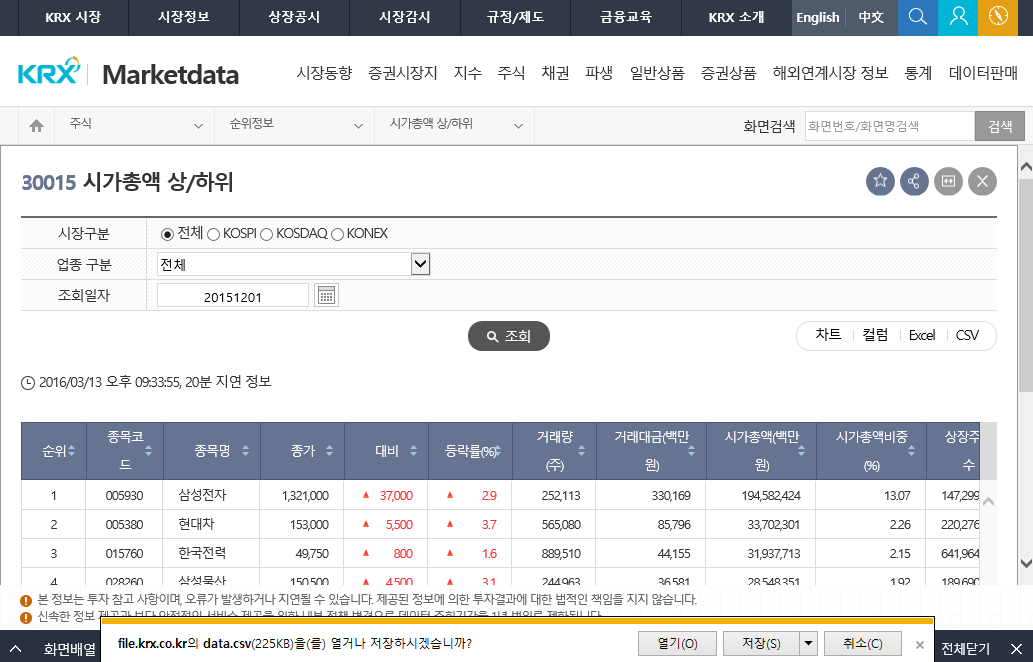

In [2]:
from IPython.display import Image
Image(filename='images/marketdata_30015.png')

In [4]:
! head -20 ./dat/marcap-2015.csv

순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가총액(백만원),시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%)
1,005930,삼성전자,"1,295,000","상승 3,000",0.23,"207,148","268,005","190,752,641",13.04,"147,299,337","72,858,065",49.46
2,005380,현대차,"151,500","하락 1,500",-0.98,"697,842","106,227","33,371,887",2.28,"220,276,479","96,759,116",43.93
3,015760,한국전력,"50,300",상승 350,0.70,"1,079,479","54,193","32,290,793",2.21,"641,964,077","204,358,747",31.83
4,028260,삼성물산,"147,500","하락 1,000",-0.67,"278,739","41,335","27,979,281",1.91,"189,690,043","18,689,887",9.85
5,005935,삼성전자우,"1,090,000","상승 5,000",0.46,"44,463","48,372","24,888,435",1.70,"22,833,427","17,276,502",75.66
6,012330,현대모비스,"250,500","하락 3,000",-1.18,"115,569","28,969","24,384,638",1.67,"97,343,863","49,270,829",50.62
7,090430,아모레퍼시픽,"414,500",상승 500,0.12,"57,752","23,907","24,231,044",1.66,"58,458,490","18,104,549",30.97
8,000660,SK하이닉스,"32,700",상승 500,1.55,"5,331,047","174,046","23,805,677",1.63,"728,002,365","341,746,550",46.94
9,051910,LG화학,"339,500","상승 6,500"

In [5]:
! wc -l dat/marcap-20*.csv

   1518 dat/marcap-2000.csv
   1617 dat/marcap-2001.csv
   1718 dat/marcap-2002.csv
   1751 dat/marcap-2003.csv
   1752 dat/marcap-2004.csv
   1790 dat/marcap-2005.csv
   1861 dat/marcap-2006.csv
   1942 dat/marcap-2007.csv
   1978 dat/marcap-2008.csv
   1962 dat/marcap-2009.csv
   1963 dat/marcap-2010.csv
   1975 dat/marcap-2011.csv
   1941 dat/marcap-2012.csv
   1978 dat/marcap-2013.csv
   2036 dat/marcap-2014.csv
   2134 dat/marcap-2015.csv
  29916 total


## Python pandas로 CSV 파일 처리

저정한 CSV 파일들을 읽고 필요한 가공을 하여 모두 합쳐 하나의 CSV 파일로 저장하고자 한다.

이 과정을 개발하기 위해 시험삼아 먼저 파이썬 pandas에서 CSV 파일을 읽어본다


In [11]:
import pandas as pd
df = pd.read_csv('dat/marcap-2015.csv')
#df[['종목코드','종목명','시가총액(백만원)','시가총액비중(%)']].head(10)
df[:10]

,순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가총액(백만원),시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%)
0,1,005930,삼성전자,"1,295,000","상승 3,000",0.23,"207,148","268,005","190,752,641",13.04,"147,299,337","72,858,065",49.46
1,2,005380,현대차,"151,500","하락 1,500",-0.98,"697,842","106,227","33,371,887",2.28,"220,276,479","96,759,116",43.93
2,3,015760,한국전력,"50,300",상승 350,0.70,"1,079,479","54,193","32,290,793",2.21,"641,964,077","204,358,747",31.83
3,4,028260,삼성물산,"147,500","하락 1,000",-0.67,"278,739","41,335","27,979,281",1.91,"189,690,043","18,689,887",9.85
4,5,005935,삼성전자우,"1,090,000","상승 5,000",0.46,"44,463","48,372","24,888,435",1.70,"22,833,427","17,276,502",75.66
5,6,012330,현대모비스,"250,500","하락 3,000",-1.18,"115,569","28,969","24,384,638",1.67,"97,343,863","49,270,829",50.62
6,7,090430,아모레퍼시픽,"414,500",상승 500,0.12,"57,752","23,907","24,231,044",1.66,"58,458,490","18,104,549",30.97
7,8,000660,SK하이닉스,"32,700",상승 500,1.55,"5,331,047","174,046","23,805,677",1.63,"728,002,365","341,746,550",46.94
8,9,051910,LG화학,"339,500","상승 6,500",1.95,"255,014","86,747","22,499,038",1.54,"66,271,100","25,309,846",38.19
9,10,032830,삼성생명,"109,500","상승 1,000",0.92,"277,052","30,283","21,900,000",1.50,"200,000,000","36,073,430",18.04


In [8]:
len(df)

2133

In [9]:
df.dtypes

순위              int64
종목코드           object
종목명            object
현재가            object
대비             object
등락률           float64
거래량            object
거래대금           object
시가총액(백만원)      object
시가총액비중(%)     float64
상장주식수(천주)      object
외국인 보유주식수      object
외국인 지분율(%)    float64
dtype: object

In [15]:
s=df['현재가'].str.replace(',', '').astype('int')
s.head()

0    1295000
1     151500
2      50300
3     147500
4    1090000
Name: 현재가, dtype: int64

In [16]:
df = pd.read_csv('dat/marcap-2015.csv', thousands=',', dtype={'종목코드':'str'})
df.head()

,순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가총액(백만원),시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%)
0,1,005930,삼성전자,1295000,"상승 3,000",0.23,207148,268005,190752641,13.04,147299337,72858065,49.46
1,2,005380,현대차,151500,"하락 1,500",-0.98,697842,106227,33371887,2.28,220276479,96759116,43.93
2,3,015760,한국전력,50300,상승 350,0.70,1079479,54193,32290793,2.21,641964077,204358747,31.83
3,4,028260,삼성물산,147500,"하락 1,000",-0.67,278739,41335,27979281,1.91,189690043,18689887,9.85
4,5,005935,삼성전자우,1090000,"상승 5,000",0.46,44463,48372,24888435,1.70,22833427,17276502,75.66


In [18]:
df.dtypes

순위              int64
종목코드           object
종목명            object
현재가             int64
대비             object
등락률           float64
거래량             int64
거래대금            int64
시가총액(백만원)       int64
시가총액비중(%)     float64
상장주식수(천주)       int64
외국인 보유주식수       int64
외국인 지분율(%)    float64
dtype: object

In [19]:
df.columns

Index(['순위', '종목코드', '종목명', '현재가', '대비', '등락률', '거래량', '거래대금', '시가총액(백만원)',
       '시가총액비중(%)', '상장주식수(천주)', '외국인 보유주식수', '외국인 지분율(%)'],
      dtype='object')

In [24]:
df = df[['순위', '종목코드', '종목명', '시가총액(백만원)', '시가총액비중(%)']]
df.head()

,순위,종목코드,종목명,시가총액(백만원),시가총액비중(%)
0,1,005930,삼성전자,190752641,13.04
1,2,005380,현대차,33371887,2.28
2,3,015760,한국전력,32290793,2.21
3,4,028260,삼성물산,27979281,1.91
4,5,005935,삼성전자우,24888435,1.70


In [25]:
df.columns = ['rank', 'code', 'corp_name', 'marcap', 'marcap_pct']
df.head()

,rank,code,corp_name,marcap,marcap_pct
0,1,005930,삼성전자,190752641,13.04
1,2,005380,현대차,33371887,2.28
2,3,015760,한국전력,32290793,2.21
3,4,028260,삼성물산,27979281,1.91
4,5,005935,삼성전자우,24888435,1.70


In [26]:
df['year']= pd.to_datetime('2015-12-01')
df.head()

,rank,code,corp_name,marcap,marcap_pct,year
0,1,005930,삼성전자,190752641,13.04,2015-12-01
1,2,005380,현대차,33371887,2.28,2015-12-01
2,3,015760,한국전력,32290793,2.21,2015-12-01
3,4,028260,삼성물산,27979281,1.91,2015-12-01
4,5,005935,삼성전자우,24888435,1.70,2015-12-01


In [27]:
df['marcap'] = df['marcap'] / 1000000. # 백(10^6) 단위에서 조(10^12) 단위로 변경
df.head()

,rank,code,corp_name,marcap,marcap_pct,year
0,1,005930,삼성전자,190.752641,13.04,2015-12-01
1,2,005380,현대차,33.371887,2.28,2015-12-01
2,3,015760,한국전력,32.290793,2.21,2015-12-01
3,4,028260,삼성물산,27.979281,1.91,2015-12-01
4,5,005935,삼성전자우,24.888435,1.70,2015-12-01


In [28]:
df.marcap.sum()  # 시가총액 전체 (조단위)

1462.515474

In [29]:
df['marcap_pct'].sum()

99.010000000000005

In [31]:
url_tmpl = "dat/marcap-%s.csv"

def read_marcap(year):
    df = pd.read_csv( url_tmpl % str(year), dtype={'종목코드':'str'}, thousands=',')
    df = df[['순위', '종목코드', '종목명', '시가총액(백만원)', '시가총액비중(%)']]
    df.columns = ['rank', 'code', 'corp_name', 'marcap', 'marcap_pct']
    df['year']= pd.to_datetime(str(year) +  '-12-01')  # 날짜 "YYYY-12-01" 컬럼으로 추가
    df['marcap'] = df['marcap'] / 1000000.    # 백(10^6) 단위에서 조(10^12) 단위로 변경
    df['marcap_pct'] = df['marcap'] /  df['marcap'].sum()
    return df

dataframes = []
for year in range(1995, 2016):
    dataframes.append( read_marcap(year) )

df_master = pd.concat(dataframes)
df_master.set_index('code', drop=False, inplace=True)
df_master.head()


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
015760,1,015760,한국전력공사,18.994194,0.134566,1995-12-01
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005490,3,005490,포항종합제철,4.760822,0.033728,1995-12-01
017670,4,017670,한국이동통신,3.229820,0.022882,1995-12-01
000200,5,000200,대우중공업,3.019233,0.021390,1995-12-01


In [32]:
df_master.ix[df_master['code'] == '005380']

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005380,13,005380,현대자동차,1.408595,0.009979,1995-12-01
005380,24,005380,현 대 차,0.802618,0.006422,1996-12-01
005380,16,005380,현 대 차,0.750448,0.009614,1997-12-01
005380,24,005380,현 대 차,1.072802,0.007364,1998-12-01
005380,18,005380,현 대 차,3.752473,0.008233,1999-12-01
005380,13,005380,현대차,2.771973,0.010605,2000-12-01
005380,8,005380,현대차,5.893486,0.019138,2001-12-01
005380,7,005380,현대차,6.079711,0.020515,2002-12-01
005380,7,005380,현대차,11.085684,0.028207,2003-12-01


In [34]:
df_2015 = pd.read_csv( 'dat/marcap-2015.csv')
df_2015 = df_2015[['순위', '종목코드', '종목명', '시가총액(백만원)', '시가총액비중(%)']]
df_2015.columns = ['rank', 'code', 'corp_name', 'marcap', 'marcap_pct']
df_2015.head()

,rank,code,corp_name,marcap,marcap_pct
0,1,005930,삼성전자,"190,752,641",13.04
1,2,005380,현대차,"33,371,887",2.28
2,3,015760,한국전력,"32,290,793",2.21
3,4,028260,삼성물산,"27,979,281",1.91
4,5,005935,삼성전자우,"24,888,435",1.70


In [35]:
for index, row in df_2015.iterrows():
    df_master.loc[row['code'], 'corp_name'] = row['corp_name']

In [36]:
# 현대차의 종목명이 모두 바꾸었는지 확인

t = df_master.ix[df_master['code'] == '005380']
t.head(10)

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005380,13,005380,현대차,1.408595,0.009979,1995-12-01
005380,24,005380,현대차,0.802618,0.006422,1996-12-01
005380,16,005380,현대차,0.750448,0.009614,1997-12-01
005380,24,005380,현대차,1.072802,0.007364,1998-12-01
005380,18,005380,현대차,3.752473,0.008233,1999-12-01
005380,13,005380,현대차,2.771973,0.010605,2000-12-01
005380,8,005380,현대차,5.893486,0.019138,2001-12-01
005380,7,005380,현대차,6.079711,0.020515,2002-12-01
005380,7,005380,현대차,11.085684,0.028207,2003-12-01


In [38]:
df_master.to_csv('dat/krx-marcap.csv', index=False)

In [40]:
# 저장된 krx-marcap.csv 를 읽고, code 컬럼을 인덱스로 지정한다.

df_master = pd.read_csv('dat/krx-marcap.csv')
df_master.set_index('code', inplace=True, drop=False)
df_master.head()

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
015760,1,015760,한국전력,18.994194,0.134566,1995-12-01
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005490,3,005490,POSCO,4.760822,0.033728,1995-12-01
017670,4,017670,SK텔레콤,3.229820,0.022882,1995-12-01
000200,5,000200,대우중공업,3.019233,0.021390,1995-12-01


In [41]:
# 컬럼의 타입들

df_master.dtypes

rank            int64
code           object
corp_name      object
marcap        float64
marcap_pct    float64
year           object
dtype: object

In [42]:
# 전체 row 수

len(df_master)

36634

In [68]:
#-*- coding:utf-8 -*-
import requests
from pandas import DataFrame as df
import pandas as pd
import io
import matplotlib.pyplot as plt

reqdate = '20160412'
file_prefix = "marcap_data_"

print ("start...")
# STEP 01: Generate OTP
gen_otp_url = 'http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx'
gen_otp_data = {
    'name':'fileDown',
    'filetype':'csv',
    'url':'MKD/04/0404/04040200/mkd04040200_01',
    'market_gubun':'KSQ', # ''ALL':전체, STK': 코스피, KSQ 코스닥
    'indx_ind_cd':'2001',  # '': 전체, ''1001':코스피, 1028' :코스피 200, 코스닥 '2001
    'sect_tp_cd':'',
    'schdate':reqdate,
    'pagePath':'/contents/MKD/04/0404/04040200/MKD04040200.jsp',
}
    
r = requests.post(gen_otp_url, gen_otp_data)
code = r.content

# STEP 02: download
down_url = 'http://file.krx.co.kr/download.jspx'
down_data = {
    'code': code,
}

r = requests.post(down_url, down_data).content
df = pd.read_csv(io.StringIO(r.decode("utf-8")), thousands=',', dtype={'종목코드':'str'})

df = df[['종목코드', '종목명', '시가총액(백만원)', '시가총액비중(%)', '상장주식수(천주)']]
df.columns = ['code','corp_name','marcap','marcap_pct','amount']

df['market_gubun'] = 'KQ'
df.head(10)

start...


,code,corp_name,marcap,marcap_pct,amount,market_gubun
0,068270,셀트리온,12147034,5.80,113100878,KQ
1,035720,카카오,6770896,3.23,67439208,KQ
2,026960,동서,3295085,1.57,99700000,KQ
3,086900,메디톡스,2625198,1.25,5656535,KQ
4,130960,CJ E&M,2474980,1.18,38732089,KQ
5,084990,바이로메드,2138786,1.02,14306260,KQ
6,041960,코미팜,2108766,1.01,54349632,KQ
7,016170,로엔,1917111,0.92,25291705,KQ
8,047770,코데즈컴바인,1867532,0.89,37842602,KQ
9,078340,컴투스,1601869,0.77,12866420,KQ


CREATE TABLE stock_info (
    code VARCHAR(10) NOT NULL PRIMARY KEY,
    corp_name VARCHAR(100) character set utf8,
    marcap int(11),
    marcap_pct double,
    amount int(11),
    market_gubun VARCHAR(10)
   );
    

In [69]:
#-*- coding:utf-8 -*-
import pymysql
con = pymysql.connect(host='127.0.0.1', port=3306, user='root', passwd='', db='finavis', autocommit=True, use_unicode=True)
con.set_charset('utf8')
cur = con.cursor()

sql_insert = "INSERT INTO stock_info VALUES('%s', '%s', %s, %s, %s, '%s')"
for i in range(len(df)):
    sql = sql_insert % (df.ix[i].code, df.ix[i].corp_name, df.ix[i].marcap, df.ix[i].marcap_pct, df.ix[i].amount, df.ix[i].market_gubun)
    cur.execute(sql)

#cur.execute("insert into stock_info values('051910','LG 화학',21637514, 1.72, 66271100, 'KS')")
cur.execute('select * from stock_info')
result = cur.fetchall()
for row in result:
    print (row)

('000020', '동화약품', 246076, 0.02, 27931470, 'KS')
('000030', '우리은행', 6313840, 0.5, 676000000, 'KS')
('000040', 'KR모터스', 206863, 0.02, 175307764, 'KS')
('000050', '경방', 478396, 0.04, 2741527, 'KS')
('000060', '메리츠화재', 1732495, 0.14, 105963000, 'KS')
('000070', '삼양홀딩스', 1366001, 0.11, 8564271, 'KS')
('000075', '삼양홀딩스우', 23291, 0.0, 304058, 'KS')
('000080', '하이트진로', 1869061, 0.15, 70133611, 'KS')
('000087', '하이트진로2우B', 22151, 0.0, 1130138, 'KS')
('000100', '유한양행', 3368069, 0.27, 11152546, 'KS')
('000105', '유한양행우', 41097, 0.0, 236188, 'KS')
('000120', 'CJ대한통운', 4334345, 0.35, 22812344, 'KS')
('000140', '하이트진로홀딩스', 344620, 0.03, 23206765, 'KS')
('000145', '하이트진로홀딩스우', 5485, 0.0, 470810, 'KS')
('000150', '두산', 2080293, 0.17, 21270888, 'KS')
('000155', '두산우', 271281, 0.02, 4411074, 'KS')
('000157', '두산2우B', 58155, 0.0, 985685, 'KS')
('000180', '성창기업지주', 258081, 0.02, 6975160, 'KS')
('000210', '대림산업', 3125040, 0.25, 34800000, 'KS')
('000215', '대림산업우', 117800, 0.01, 3800000, 'KS')
('000220', '유유